In [1]:
import numpy as np
import matplotlib.pyplot as plt
import poppy
import astropy.units as u

# Lyot Coronagraph Simulation

In [2]:
def LyotCoronagraphField(plane='fpm',where='before'):
    wf = poppy.FresnelWavefront(2.4*u.m,wavelength=2.2*u.um)
    osys = poppy.FresnelOpticalSystem(pupil_diameter=2.4*u.m,beam_ratio=.5)
    osys.add_optic(poppy.CircularAperture(radius=1.2*u.m))
    osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
    if plane == 'fpm':
        
        if where == 'before':
            
            osys.add_optic(poppy.ScalarTransmission(),distance=7.9*2.4*u.m)
            psf = osys.calc_psf(wavelength=2.2*u.um)
            
            return psf
        else:
            osys.add_optic(poppy.CircularOcculter(radius=5*1.22*2.2e-6/2.4*206265*u.arcsec),distance=7.9*2.4*u.m) 
            psf = osys.calc_psf(wavelength=2.2*u.um)
            return psf
    
    if plane == 'lyot':
        osys.add_optic(poppy.CircularOcculter(radius=5*1.22*2.2e-6/2.4*206265*u.arcsec),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
        
        if where =='before':
            
            osys.add_optic(poppy.ScalarTransmission(),distance=7.9*2.4*u.m)
            psf = osys.propagate(wf)
            
            return psf
            
        else:
            
            osys.add_optic(poppy.CircularAperture(radius=0.9*1.2*u.m),distance=7.9*2.4*u.m)
            psf = osys.propagate(wf)
            
            return psf
        
    if plane == 'image':
        osys.add_optic(poppy.CircularOcculter(radius=5*1.22*2.2e-6/2.4*206265*u.arcsec),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.CircularAperture(radius=0.9*1.2*u.m),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.QuadraticLens(7.9*2.4*u.m),distance=7.9*2.4*u.m)
        osys.add_optic(poppy.ScalarTransmission(),distance=7.9*2.4*u.m)
        psf = osys.calc_psf(wavelength=2.2*u.um)
        return psf
            
    
    return 

In [3]:
psf = LyotCoronagraphField(plane='image')

henlo


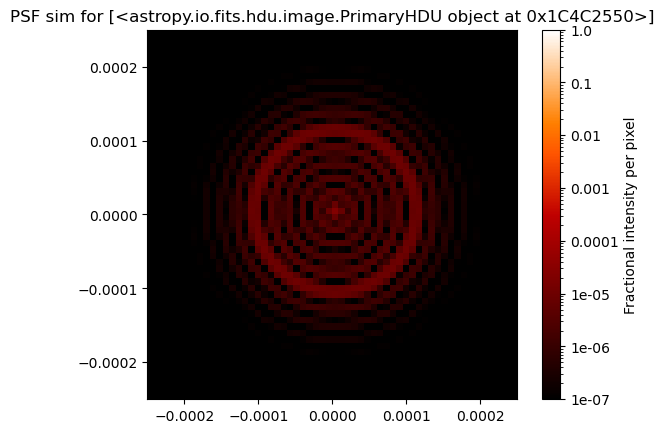

In [7]:
# FPM
plt.figure()
plt.title('image')
poppy.display_psf(psf,imagecrop=5e-4,vmax=1)
plt.show()

# Lyot
# plt.figure(figsize=[14,7])
# psf.display(what='both',imagecrop=3,vmax=0.3,colorbar=True)
# plt.show()

In [5]:
psf